# Decision Tree Classification on Titanic Dataset

## Data Loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Data Preprocessing
- Drop unnecessary columns: We'll drop 'Embarked' and 'Deck' columns
- Handle missing values: We'll fill missing values in the 'Age' and 'Fare' columns using the median.
- Encode categorical variables: We'll convert 'Sex' into numerical values (male = 0, female = 1).
- Drop rows with missing target values: We need to drop rows where the 'Survived' column is missing.

In [2]:
titanic = titanic.drop(columns=['embarked', 'deck'])

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic = titanic.dropna(subset=['survived'])

In [9]:
# selecting features(X) and target variable(y)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic['survived']
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth = 3,random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Print the model details (feature importances)
print("Feature Importances:")
for name, importance in zip(X.columns, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature Importances:
pclass: 0.1824
sex: 0.5940
age: 0.0865
sibsp: 0.0482
parch: 0.0000
fare: 0.0888


In [10]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8097014925373134
Confusion Matrix:
 [[139  18]
 [ 33  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

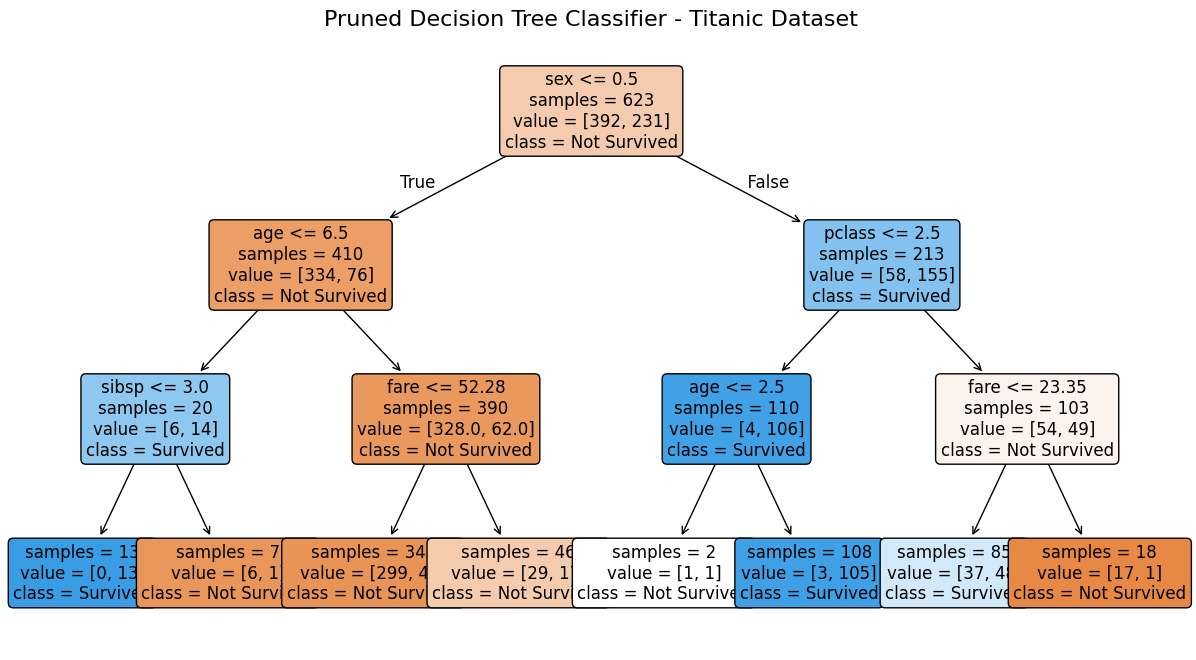

In [13]:
# Visualize the Decision Tree with simplified content in nodes
plt.figure(figsize=(15, 8))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True, 
          rounded=True, 
          fontsize=12,  # Adjust font size
          impurity=False,  # Turn off Gini impurity display
          precision=2,  # Show decimal precision
          proportion=False)  # Avoid showing proportions of classes in nodes
plt.title("Pruned Decision Tree Classifier - Titanic Dataset", fontsize=16)
plt.save()